# Generate Music wooooow

## Prepare The data
The dataset has been found on Kaggle : https://www.kaggle.com/datasets/soumikrakshit/classical-music-midi/

### create a list with all the midi files

In [12]:
import os


def get_midis():
    ms = []

    directory = "data"
    for foldername in os.listdir(directory):
        directory = os.path.join("data", foldername)
        for filename in os.listdir(directory):
            if('V2'in filename): continue
            if os.path.isfile(os.path.join(directory, filename)):
                ms.append(os.path.join(directory, filename))
                # print(filename)
    return ms

midis = get_midis()

print(midis[:5])

['data\\albeniz\\alb_esp1.mid', 'data\\albeniz\\alb_esp2.mid', 'data\\albeniz\\alb_esp3.mid', 'data\\albeniz\\alb_esp4.mid', 'data\\albeniz\\alb_esp5.mid']


In [13]:
print(len(midis))

295


In [14]:
import mido

file = mido.MidiFile(r'data\albeniz\alb_esp2.mid')

track = file.tracks[1]

# Iterate over all the messages in the track and remove all messages that are not notes
for message in track:
    # print(f'\t{message.type}: {message.dict()}')
    if(message.type != 'note_on' and message.type != 'note_off'):
        # print(f'\t{message.dict()}')
        track.remove(message)
        
for message in track:
    if(message.type == 'note_on'): print(f'{message.type}: {message.dict()}')
    

note_on: {'type': 'note_on', 'time': 360, 'note': 57, 'velocity': 49, 'channel': 0}
note_on: {'type': 'note_on', 'time': 120, 'note': 57, 'velocity': 0, 'channel': 0}
note_on: {'type': 'note_on', 'time': 0, 'note': 69, 'velocity': 55, 'channel': 0}
note_on: {'type': 'note_on', 'time': 0, 'note': 66, 'velocity': 49, 'channel': 0}
note_on: {'type': 'note_on', 'time': 0, 'note': 62, 'velocity': 49, 'channel': 0}
note_on: {'type': 'note_on', 'time': 480, 'note': 62, 'velocity': 0, 'channel': 0}
note_on: {'type': 'note_on', 'time': 0, 'note': 66, 'velocity': 0, 'channel': 0}
note_on: {'type': 'note_on', 'time': 0, 'note': 69, 'velocity': 0, 'channel': 0}
note_on: {'type': 'note_on', 'time': 360, 'note': 57, 'velocity': 46, 'channel': 0}
note_on: {'type': 'note_on', 'time': 120, 'note': 57, 'velocity': 0, 'channel': 0}
note_on: {'type': 'note_on', 'time': 0, 'note': 62, 'velocity': 48, 'channel': 0}
note_on: {'type': 'note_on', 'time': 0, 'note': 66, 'velocity': 48, 'channel': 0}
note_on: {'

Theory : the track 0 is for the tempos and rhythms.

The track 1 is for the right hand and the track 2 is for the left hand

In [15]:
import numpy as np

notes = []
print(notes)
for i in range(len(file.tracks)):
    notes.append(np.array([message.note for message in file.tracks[i] if message.type == 'note_on']))

# print(notes)
print(list(len(nts) for nts in notes))
print(list(nts.mean() for nts in notes))

[]
[0, 854, 506, 0, 0, 0, 0, 0]
[nan, 68.70257611241217, 52.3201581027668, nan, nan, nan, nan, nan]


C:\Users\lorra\AppData\Local\Temp\ipykernel_31996\1373258131.py:10: RuntimeWarning: Mean of empty slice.
  print(list(nts.mean() for nts in notes))


Let's now create a midi file while removing all the parts that i think are useless, (to check if they're indeed useless xD)

In [16]:
def createMidiFileWithAllMessages(notes, starts, velocity, fileName):
    file = mido.MidiFile()

    track = mido.MidiTrack()
    file.tracks.append(track)

    for i in range(len(notes)):
        # print(notes[n][i], starts[n][i], velocity[n][i])
        
        track.append(mido.Message('note_on', note=notes[i], velocity=velocity[i], time=starts[i]))
        
    file.save(fileName)

In [17]:
print(file.tracks[1][8].dict())
print(file.tracks[1][9].dict())
print(file.tracks[1][10].dict())

{'type': 'note_on', 'time': 480, 'note': 62, 'velocity': 0, 'channel': 0}
{'type': 'note_on', 'time': 0, 'note': 66, 'velocity': 0, 'channel': 0}
{'type': 'note_on', 'time': 0, 'note': 69, 'velocity': 0, 'channel': 0}


Let's now resume everything in one big function : 

the function will take a path and a name in input, and will create a new midi file by removing the useless tracks

In [37]:
def createMidiFileWithAllMessages(notes, starts, end, fileName, tempo=200):
    file = mido.MidiFile()

    track = mido.MidiTrack()
    file.tracks.append(track)
 
    for i in range(len(notes)):
        # print(notes[n][i], starts[n][i], velocity[n][i])
        
        track.append(mido.Message('note_on', note=notes[i], time=starts[i], velocity=0 if end[i] == True else 64))
        # f = 0
        # while(vels[i+f] != 0 and notes[i+f] != notes[i] and i+f < len(notes)):
        #     f += 1
        
        # track.append(mido.Message('note_off', note=notes[i], time=starts[i+f]))
        
        
    file.save(fileName)

In [38]:
def CreateMidiFile(path, name):
    # define the file 
    file = mido.MidiFile(path)
    # print(path)
    
    track = file.tracks[1]
        
    # Iterate over all the messages in the track
    messages = []
    for message in track:
        # print(f'\t{message.type}: {message.dict()}')
        if(message.type == 'note_on' or message.type == 'note_off'):
            # print(f'\t{message.dict()}')
            messages.append(message)
            # track.remove(message)
    
    notes = [m.note for m in messages]
    starts = [m.time for m in messages]
    vels = [m.velocity == 0 for m in messages]

    # creating the new file
    createMidiFileWithAllMessages(notes, starts, vels, name)

In [39]:
CreateMidiFile('data/albeniz/alb_esp3.mid', "camarchepas.mid")
True

True

In [40]:
li = list(range(0, 20, 2))
print(li)
for i,l in enumerate(li):
    # print(l)
    if(l == 6):
        li.remove(l)
print(li)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[0, 2, 4, 8, 10, 12, 14, 16, 18]


In [41]:
# remove the useless tracks for all the files
def createAllMidiFilesV2():
    newMidis = []

    for midi in get_midis():
        if('V2' in midi): continue
        newMidis.append(midi.split('.')[0] + "V2.mid")
        CreateMidiFile(midi, midi.split('.')[0] + "V2.mid") 
        
    return newMidis
    
midis = get_midis()
new_midis = createAllMidiFilesV2()
print(new_midis[:5])

['data\\albeniz\\alb_esp1V2.mid', 'data\\albeniz\\alb_esp2V2.mid', 'data\\albeniz\\alb_esp3V2.mid', 'data\\albeniz\\alb_esp4V2.mid', 'data\\albeniz\\alb_esp5V2.mid']


## Convert midi files to tokens

In [22]:
def get_all_messages():
    messages = []
    for midi in new_midis:
        file = mido.MidiFile(midi)
        track = file.tracks[0]
        for message in track:
            if(message.type == 'note_on' or message.type == 'note_off'):
                messages.append(message)
            # else:
            #     print(f'\t{message.type}: {message.dict()}')
    return messages

all_messages = get_all_messages()
print(len(all_messages))


762498


In [23]:
# create a matrix with all triplets of notes, starts and velocities

def getValues(midi_paths):
    values = []
    for midi in midi_paths:
        values.append((0,0,0))
        file = mido.MidiFile(midi)
        track = file.tracks[0]
        for message in track:
            if(message.type == 'note_on' or message.type == 'note_off'):
                values.append((message.note, message.time, message.velocity == 0))
        values.append((1,1,1))
    return np.array(values)

def valuesToMessages(values):
    notes = values[:, 0]
    starts = values[:, 1]
    velocities = values[:, 2]
    return [mido.Message('note_on', note=notes[i], velocity=0 if velocities[i]==True else 64, time=starts[i]) for i in range(len(notes))]


X = getValues(new_midis)
# print(midi_messages[:5])


In [24]:
print(X.shape)
print(X[:5])
print(X.dtype)

(763088, 3)
[[   0    0    0]
 [  81  240   60]
 [  81  240    0]
 [  88    0   66]
 [  88 1560    0]]
int32


In [25]:
# round every velocity to the nearest 10 to reduce the number of unique values

X = getValues(new_midis)

print(np.unique(X, axis=0).shape[0])
# print(midi_messages[:5])
# round every velocity to the nearest 10
print(np.mean(X[:, 2]))
X[:, 2] = np.round(X[:, 2], -1)
print(np.mean(X[:, 2]))

# print(midi_messages[:5])
print(np.unique(X, axis=0).shape[0])

43852
27.72773782316063
27.73251577799677
19307


In [26]:
a = np.random.randint(0, 1000, 5)
print(a)
print(np.round(a, -2))


[339 879 585 919 114]
[300 900 600 900 100]


In [27]:
# round every time to the nearest 100 to reduce the number of unique values

print(np.unique(X, axis=0).shape[0])
# print(midi_messages[:5])
# round every velocity to the nearest 10
print(np.mean(X[:, 1]))
X[:, 1] = np.round(X[:, 1], -2)
print(np.mean(X[:, 1]))

# print(midi_messages[:5])
print(np.unique(X, axis=0).shape[0])

19307
81.6041622984505
79.59252406013461
5016


763088 5016 0.006573291678024029
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

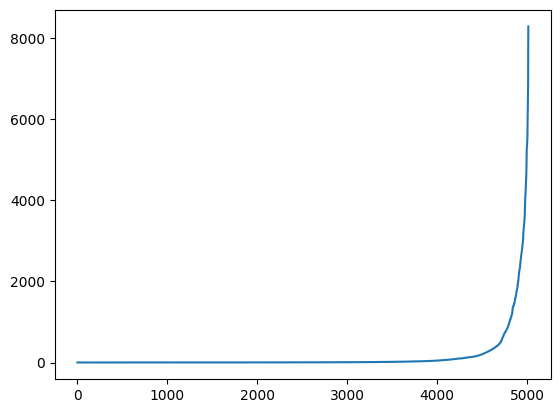

In [28]:
full_size = X.shape[0]
nuniques = np.unique(X, axis=0).shape[0]
print(full_size, nuniques, nuniques/full_size)
a = np.sort(np.unique(X, axis=0, return_counts=True)[1])
print(list(a))
print(np.median(a))

import matplotlib.pyplot as plt
plt.plot(a)

In [29]:
number_unique = a

print(len(number_unique[number_unique <= 100]))

4260


### description of the matrix X :
- DATA
    - start : (0, 0, 0)
    - end   : (1, 1, 1)
    - else  : (note, time, velocity)
- Shape : 
    - (763 088, 3)
    - unique values : 11705

## Apply transformers to the input

In [30]:
# convert values to midi

## Remove Velocity (apply default velocity)

In [31]:
def createMidiFileWithAllMessagesWithoutVel(notes, starts, end, fileName, tempo=200):
    file = mido.MidiFile()

    track = mido.MidiTrack()
    file.tracks.append(track)
 
    for i in range(len(notes)):
        # print(notes[n][i], starts[n][i], velocity[n][i])
        
        track.append(mido.Message('note_on', note=notes[i], time=starts[i], velocity=0 if end[i] == True else 64))
        # f = 0
        # while(vels[i+f] != 0 and notes[i+f] != notes[i] and i+f < len(notes)):
        #     f += 1
        
        # track.append(mido.Message('note_off', note=notes[i], time=starts[i+f]))
        
        
    file.save(fileName)

In [33]:
def CreateMidiFileWithoutVel(path, name):
    # define the file 
    file = mido.MidiFile(path)
    # print(path)
    
    track = file.tracks[1]
        
    # Iterate over all the messages in the track
    messages = []
    for message in track:
        # print(f'\t{message.type}: {message.dict()}')
        if(message.type == 'note_on' or message.type == 'note_off'):
            # print(f'\t{message.dict()}')
            messages.append(message)
            # track.remove(message)
    
    notes = [m.note for m in messages]
    starts = [m.time for m in messages]
    vels = [m.velocity == 0 for m in messages]

    # creating the new file
    createMidiFileWithAllMessagesWithoutVel(notes, starts, vels, name)

In [36]:
CreateMidiFileWithoutVel('data/chopin/chp_op18.mid', "camarchepas.mid")